# Computational Thinking Analysis
This notebook analyzes student performance across different dimensions of Computational Thinking (CT):
- **CZ**: Conceptualization
- **PP**: Problem-solving Process
- **WT**: Working with Technology
- **SF**: Systems Thinking
- **HZ**: Human-centered Aspects

It performs summary statistics and applies K-Means clustering for grouping similar students.

In [8]:
# Imports
import micropip
await micropip.install('seaborn')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("computational thinking scores.csv", sep="\t")
df.head()

,CZ1;CZ2;CZ3;CZ4;CZ5;CZ6;PP1;PP2;PP3;WT1;WT2;WT3;WT4;WT5;WT6;SF1;SF2;SF3;SF4;HZ1;HZ2;HZ3;HZ4
0,5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;3;5;5;5
1,5;5;5;5;5;5;5;4;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5
2,5;5;3;4;4;3;4;5;4;5;5;3;5;5;5;5;5;5;5;3;3;3;3
3,5;4;4;4;4;5;4;5;5;4;4;4;4;5;4;4;4;4;5;5;5;5;5
4,5;5;5;5;5;5;4;5;5;4;3;5;5;3;3;5;5;5;5;5;5;5;5


In [10]:
import pandas as pd

# Load your data
df = pd.read_csv('computational thinking scores.csv')

# Step 1: Split semicolon-separated strings
df = df.apply(lambda x: x.str.split(';').explode())

# Step 2: Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Step 3: Create dimension groups
dimension_groups = {
    'CZ': df.loc[:, df.columns.str.startswith('CZ')],
    'PP': df.loc[:, df.columns.str.startswith('PP')],
    'WT': df.loc[:, df.columns.str.startswith('WT')],
    'SF': df.loc[:, df.columns.str.startswith('SF')],
    'HZ': df.loc[:, df.columns.str.startswith('HZ')]
}

# Step 4: Calculate means
dimension_summary = pd.DataFrame({
    dim: group.mean(axis=1)
    for dim, group in dimension_groups.items()
})

# Now you can proceed with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dimension_summary)

In [13]:
# Apply KMeans with chosen number of clusters
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Impute missing values
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data_imputed)

# Continue with your analysis
dimension_summary['Cluster'] = clusters
dimension_summary.groupby('Cluster').mean()

,CZ,PP,WT,SF,HZ
Cluster,,,,,
0,2.786413,NaN,NaN,NaN,NaN
1,5.000000,NaN,NaN,NaN,NaN
2,4.000000,NaN,NaN,NaN,NaN


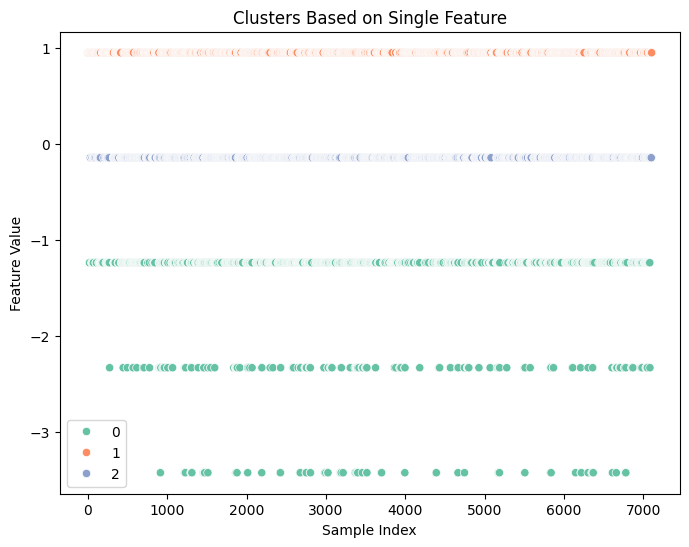

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=range(len(scaled_data)),  # Sample index
    y=scaled_data[:, 0],       # Your single feature
    hue=clusters,
    palette="Set2"
)
plt.title("Clusters Based on Single Feature")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.show()